<a href="https://colab.research.google.com/github/piercepatrick/Masters-Program-Tuition-Predictor/blob/master/Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib

In [ ]:
df = pd.read_csv('/content/drive/My Drive/DS/Data Masters Programs/masters_final_df.csv')
df.head()

,Unnamed: 0,university_name,program_name,tags,duration,tuition,start_date,description,state,city,world_ranking,disciplines,delivered,gpa,gre,toefl,ielts,credits,gpa_yn,university_tier_ranking,gmat_yn,ielts_yn,toefl_yn,gre_yn,fall_start_yn,spring_start_yn,summer_start_yn,desc_len,tuition_per_month
0,0,University of Rochester,Data Science,M.Sc.,12.0,1784.0,8/25/2021,goergen institute data science offers stem acc...,New York,Rochester,125.0,Data Science & Big Data,On Campus,NaN,Required,105.0,7.0,30.0,0,2,0,1,1,1,1,0,0,134,148.67
1,1,Bellevue University,Data Science,M.Sc.,24.0,585.0,3/9/2021,data science program bellevue university desig...,Nebraska,Bellevue,NaN,Data Science & Big Data,Online,3.0,Not Required,71.0,0.0,30.0,1,5,0,1,1,0,0,1,0,127,24.38
2,2,New York University,Data Science,M.Sc.,24.0,22272.0,9/2/2021,master science data science new york universit...,New York,New York City,28.0,Data Science & Big Data,On Campus,NaN,Required,105.0,7.0,36.0,0,1,0,1,1,1,1,0,0,199,928.00
3,3,Lipscomb University,Data Science,Master,12.0,1288.0,8/19/2020,data science program offered lipscomb universi...,Tennessee,Memphis,NaN,Informatics & Information Sciences,On Campus,NaN,Not Required,71.0,0.0,30.0,0,5,0,1,1,0,1,0,0,128,107.33
4,4,University of Massachusetts Dartmouth,Data Science,M.Sc.,12.0,22183.0,4/15/2021,data science program university massachusetts ...,New York,New York City,191.0,Data Science & Big Data,On Campus,3.0,Required,100.0,7.5,30.0,1,2,0,1,1,1,0,1,0,228,1848.58


In [ ]:
df.columns

Index(['Unnamed: 0', 'university_name', 'program_name', 'tags', 'duration',
       'tuition', 'start_date', 'description', 'state', 'city',
       'world_ranking', 'disciplines', 'delivered', 'gpa', 'gre', 'toefl',
       'ielts', 'credits', 'gpa_yn', 'university_tier_ranking', 'gmat_yn',
       'ielts_yn', 'toefl_yn', 'gre_yn', 'fall_start_yn', 'spring_start_yn',
       'summer_start_yn', 'desc_len', 'tuition_per_month'],
      dtype='object')

In [ ]:
df.tags.unique()

array([' M.Sc. ', ' Master ', ' Postgraduate Certificate ', ' M.B.A. ',
       ' M.A. ', ' M.Eng. '], dtype=object)

In [ ]:
df_model = df[['tuition','university_tier_ranking','tags','duration','state','disciplines','delivered','gpa_yn',
             'gre','toefl','ielts','credits','gmat_yn','fall_start_yn','spring_start_yn','summer_start_yn','desc_len']]

In [ ]:
df_model.shape

(374, 17)

In [ ]:
# get dummy data 
df_dum = pd.get_dummies(df_model)

In [ ]:
df_dum.shape

(374, 108)

In [ ]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [ ]:
X = df_dum.drop('tuition', axis =1)
y = df_dum.tuition.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Statsmodels multiple linear regression
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     3.664
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.02e-17
Time:                        21:25:57   Log-Likelihood:                -4035.9
No. Observations:                 374   AIC:                             8280.
Df Residuals:                     270   BIC:                             8688.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                 2.82e+04   4692.691      6.009      0.000     1.9e+04    3.74e+04
university_tier_ranking                             -5976.8041    681.529     -8.770      0.000   -7318.590   -4635.018
duration                                             -280.5373    143.679     -1.953      0.052    -563.412       2.337
gpa_yn                                               2116.0064   1704.757      1.241      0.216   -1240.300    5472.313
toefl                                                  -1.5383     46.585     -0.033      0.974     -93.254      90.178
ielts                                                -452.7688    548.088     -0.826      0.409   -1531.838     626.301
credits                                               -51.2007     83.899     -0.610      0.542    -216.381     113.979
gmat_yn                                              3217.2635   2893.705      1.112      0.267   -2479.831    8914.358
fall_start_yn                                       -3989.3528   2382.546     -1.674      0.095   -8680.082     701.377
spring_start_yn                                     -5837.4704   3292.856     -1.773      0.077   -1.23e+04     645.468
summer_start_yn                                     -1.297e+04   6039.009     -2.147      0.033   -2.49e+04   -1078.597
desc_len                                               11.7373     14.409      0.815      0.416     -16.630      40.105
tags_ M.A.                                           1.203e+04   5562.100      2.163      0.031    1079.626     2.3e+04
tags_ M.B.A.                                        -1.549e+04   8371.611     -1.851      0.065    -3.2e+04     987.222
tags_ M.Eng.                                         1.611e+04   7791.623      2.068      0.040     774.408    3.15e+04
tags_ M.Sc.                                          9299.7598   2689.168      3.458      0.001    4005.355    1.46e+04
tags_ Master                                         7203.1489   3244.478      2.220      0.027     815.457    1.36e+04
tags_ Postgraduate Certificate                       -956.3046   6150.207     -0.155      0.877   -1.31e+04    1.12e+04
state_Alabama                                        2056.1757   8537.818      0.241      0.810   -1.48e+04    1.89e+04
state_Arizona                                        1318.9463   5429.066      0.243      0.808   -9369.740     1.2e+04
state_Arkansas                                       4453.1821   1.02e+04      0.437      0.662   -1.56e+04    2.45e+04
state_California                                    -1378.5826   2683.263     -0.514      0.608   -6661.362    3904.197
state_Colorado                                      -1.642e+04   8842.793     -1.85

In [ ]:
# sklearn multiple linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=2))

-15258.587148200215

In [ ]:
# lasso regression
lm_l = Lasso(alpha=1,max_iter=100000)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-14139.922720804176

In [ ]:
coef = pd.Series(lm_l.coef_, index = X_train.columns)

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 101 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

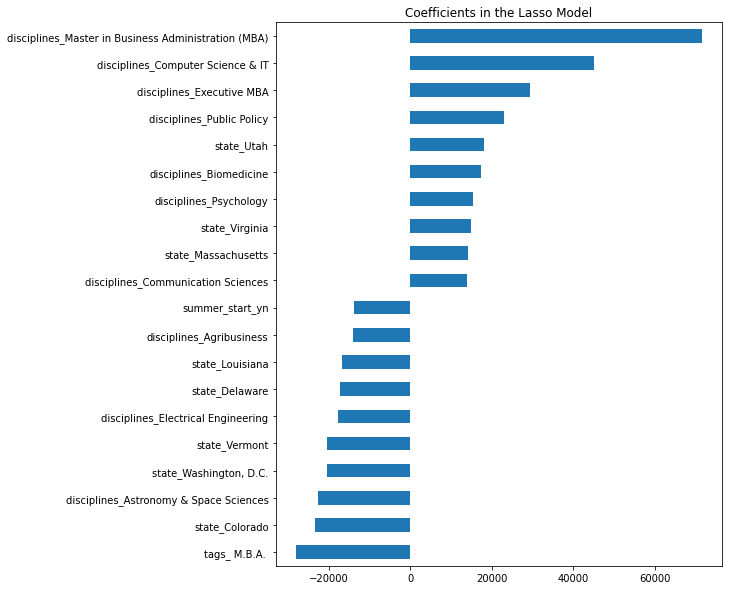

In [ ]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [ ]:
# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-11511.74055185185

In [ ]:
# tune random forest w/ GridsearchCV 
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
gs.best_score_

-11225.534094276096

In [ ]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# support vector regression
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
y = np.squeeze(sc_Y.fit_transform(y.reshape(-1, 1)))

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
np.mean(cross_val_score(regressor,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-15238.470387396112

In [ ]:
# xgboost
X = df_dum.drop('tuition', axis =1)
y = df_dum.tuition.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from xgboost import XGBRegressor
my_model = XGBRegressor(silent = True)
my_model.fit(X_train, y_train, verbose=False)
np.mean(cross_val_score(my_model,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-12013.241117888683

In [ ]:
# tuning xgboost
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.01, silent = True)
my_model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)
np.mean(cross_val_score(my_model,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-11927.41181820648

In [ ]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)
tpred_xgb = my_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)

2325392504296.5835

In [ ]:
mean_absolute_error(y_test,tpred_lml)

12644.761504099342

In [ ]:
mean_absolute_error(y_test,tpred_rf)

10954.566666666668

In [ ]:
mean_absolute_error(y_test,tpred_xgb)

11988.921188151042

In [ ]:
X = df_dum.drop('tuition', axis =1)
y = df_dum.tuition.values
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)
tpred_svr = regressor.predict(X_test)

In [ ]:
mean_absolute_error(y_test,tpred_svr)

15750.646881359253